In [1]:
from concurrent.futures import ThreadPoolExecutor

%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

import segregation

In [2]:
GLOBAL_T0 = time.time()

In [3]:
os.chdir('C:\\Users\\renan\\Desktop\\segregation\\segregation')

from segregation.dissimilarity import Dissim
from segregation.spatial_dissimilarity import Spatial_Dissim
from segregation.entropy import Entropy
from segregation.perimeter_area_ratio_spatial_dissimilarity import Perimeter_Area_Ratio_Spatial_Dissim
from segregation.absolute_centralization import Absolute_Centralization
from segregation.absolute_concentration import Absolute_Concentration
from segregation.atkinson import Atkinson
from segregation.bias_corrected_dissimilarity import Bias_Corrected_Dissim
from segregation.boundary_spatial_dissimilarity import Boundary_Spatial_Dissim
from segregation.conprof import Con_Prof
from segregation.correlationr import Correlation_R
from segregation.delta import Delta
from segregation.density_corrected_dissimilarity import Density_Corrected_Dissim
from segregation.exposure import Exposure
from segregation.gini_seg import Gini_Seg
from segregation.isolation import Isolation
from segregation.modified_dissimilarity import Modified_Dissim
from segregation.modified_gini_seg import Modified_Gini_Seg
from segregation.relative_centralization import Relative_Centralization
from segregation.relative_clustering import Relative_Clustering
from segregation.relative_concentration import Relative_Concentration
from segregation.spatial_exposure import Spatial_Exposure
from segregation.spatial_isolation import Spatial_Isolation
from segregation.spatial_prox_profile import Spatial_Prox_Prof
from segregation.infer_segregation import Infer_Segregation
from segregation.compare_segregation import Compare_Segregation
from segregation.spatial_proximity import Spatial_Proximity

In [4]:
os.chdir('C:/Users/renan/Desktop/full_count_2010')
census_2010 = pd.read_csv('std_2010_fullcount.csv', encoding = "ISO-8859-1", sep = ",")

with open('tracts_US.pkl', 'rb') as input:
    map_gpd = pickle.load(input)

In [5]:
df = census_2010.loc[(census_2010.county == "Los Angeles County")] # & (census_2010.state == 'WI')
df.head()

,trtid10,state,county,tract,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
7819,6037920044,CA,Los Angeles County,Census Tract 9200.44,2686,1637,87,10,291,651,...,206,49,243,34,42,3,0,1,wha,Dual immig
7821,6037573003,CA,Los Angeles County,Census Tract 5730.03,1802,337,291,7,319,840,...,239,69,305,50,42,7,0,3,wbha,Global
7823,6037570403,CA,Los Angeles County,Census Tract 5704.03,4587,115,727,9,205,3521,...,1292,178,202,32,43,4,1,2,bha,Minority
7824,6037553503,CA,Los Angeles County,Census Tract 5535.03,2768,124,389,6,62,2178,...,646,182,54,10,11,2,0,1,bh,Minority
7825,6037552302,CA,Los Angeles County,Census Tract 5523.02,3648,681,206,28,516,2209,...,579,361,490,72,146,8,1,1,wbha,Global


In [6]:
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
gdf = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')

# REMOVING ISLANDS OF LOS ANGELES COUNTY
#gdf = gdf[gdf.centroid.y > 33.6]
#gdf = gdf.set_geometry('geometry')

gdf['share'] = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['nhblk10'].sum())
gdf['rel']   = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['pop10'])

In [7]:
gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,COUNTY_ID,county_id2,COUNTYNS10,NAME10_COU,GEOID_MSA,...,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10,share,rel
0,06,037,920336,06037920336,9203.36,06037,6037,277283,Los Angeles,31080,...,209,21,46,16,5,0,wha,Dual immig,0.000120,0.014942
1,06,037,920044,06037920044,9200.44,06037,6037,277283,Los Angeles,31080,...,243,34,42,3,0,1,wha,Dual immig,0.000099,0.032390
2,06,037,573003,06037573003,5730.03,06037,6037,277283,Los Angeles,31080,...,305,50,42,7,0,3,wbha,Global,0.000332,0.161487
3,06,037,571704,06037571704,5717.04,06037,6037,277283,Los Angeles,31080,...,614,152,72,12,3,0,bha,Minority,0.000804,0.171658
4,06,037,570403,06037570403,5704.03,06037,6037,277283,Los Angeles,31080,...,202,32,43,4,1,2,bha,Minority,0.000829,0.158491


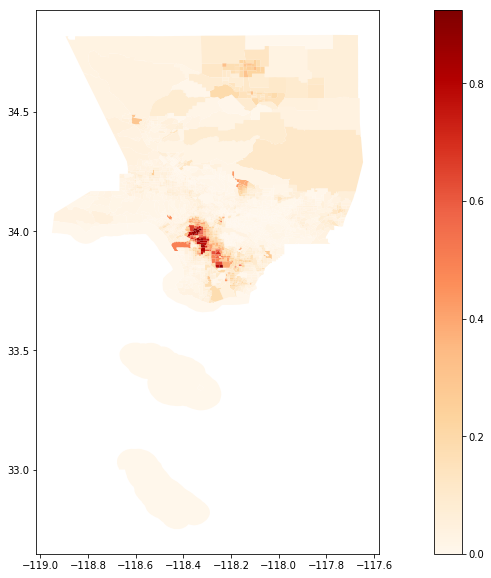

In [8]:
import matplotlib
ax1 = gdf.plot(column='rel',
               cmap = 'OrRd', 
               #figsize=(30,5),
               figsize=(20,10),
               legend = True)

In [9]:
# Using the geopandas, because two islands were removed

# Non-Spatial measures
D = Dissim(gdf, 'nhblk10', 'pop10')
G = Gini_Seg(gdf, 'nhblk10', 'pop10')
H = Entropy(gdf, 'nhblk10', 'pop10')
A = Atkinson(gdf, 'nhblk10', 'pop10')
xPy = Exposure(gdf, 'nhblk10', 'pop10')
xPx = Isolation(gdf, 'nhblk10', 'pop10')
R = Con_Prof(gdf, 'nhblk10', 'pop10')
Dbc = Bias_Corrected_Dissim(gdf, 'nhblk10', 'pop10')
Ddc = Density_Corrected_Dissim(gdf, 'nhblk10', 'pop10')
V = Correlation_R(gdf, 'nhblk10', 'pop10')
Dct = Modified_Dissim(gdf, 'nhblk10', 'pop10')
Gct = Modified_Gini_Seg(gdf, 'nhblk10', 'pop10')

In [10]:
# Spatial measures
SD = Spatial_Dissim(gdf, 'nhblk10', 'pop10')
PARD = Perimeter_Area_Ratio_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
BSD = Boundary_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
ACE = Absolute_Centralization(gdf, 'nhblk10', 'pop10')
ACO = Absolute_Concentration(gdf, 'nhblk10', 'pop10')
DEL = Delta(gdf, 'nhblk10', 'pop10')
RCE = Relative_Centralization(gdf, 'nhblk10', 'pop10')
RCL = Relative_Clustering(gdf, 'nhblk10', 'pop10')
RCO = Relative_Concentration(gdf, 'nhblk10', 'pop10')
SxPy = Spatial_Exposure(gdf, 'nhblk10', 'pop10')
SxPx = Spatial_Isolation(gdf, 'nhblk10', 'pop10')
SPP = Spatial_Prox_Prof(gdf, 'nhblk10', 'pop10')
SP = Spatial_Proximity(gdf, 'nhblk10', 'pop10')

In [11]:
overall_iterations_frequency = 500

In [12]:
def Timed_Infer_Segregation(index, **kwargs):
    t0 = time.time()
    aux = Infer_Segregation(index, **kwargs)
    t1 = time.time()
    print('{} time: {}'.format(aux._class_name, t1 - t0))
    return aux

In [13]:
def Timed_Compare_Segregation(tupled_pair, **kwargs):
    t0 = time.time()
    index1, index2 = tupled_pair
    aux = Compare_Segregation(index1, index2, **kwargs)
    t1 = time.time()
    print('{} time: {}'.format(aux._class_name, t1 - t0))
    return aux

### Los Angeles in 2010: systematic approach

In [14]:
all_measures = (D, G, H, xPx, xPy, A, V, R, Dct, Gct, Dbc, Ddc, SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

In [15]:
e = ThreadPoolExecutor()

sys_application = [e.submit(Timed_Infer_Segregation, i, iterations = overall_iterations_frequency) 
                       for i in all_measures]

In [16]:
sys_application_result = [f.result() for f in sys_application]

Dissim time: 2.6111297607421875
Isolation time: 11.053466320037842
Exposure time: 11.296485424041748
Correlation_R time: 11.455972909927368
Entropy time: 12.032744646072388
Atkinson time: 13.407771348953247
Gini_Seg time: 67.89214968681335
Delta time: 510.16402983665466
Relative_Concentration time: 512.7082426548004
Absolute_Concentration time: 516.3802320957184
Con_Prof time: 1238.621904850006
Bias_Corrected_Dissim time: 1427.9786059856415
Modified_Dissim time: 2057.5918941497803
Relative_Centralization time: 3852.637234687805
Absolute_Centralization time: 3934.760809659958
Relative_Clustering time: 3956.400916814804
Spatial_Proximity time: 3978.848281621933
Spatial_Isolation time: 3979.666449069977
Spatial_Exposure time: 4005.604326725006
Spatial_Dissim time: 6617.272361755371
Boundary_Spatial_Dissim time: 9304.666760444641
Perimeter_Area_Ratio_Spatial_Dissim time: 9462.815070867538
Density_Corrected_Dissim time: 14128.985298156738
Spatial_Prox_Prof time: 16354.540931940079
Modified_

In [17]:
# Save results
with open('sys_application_result_notebook.pkl', 'wb') as output:
    pickle.dump(sys_application_result, output, pickle.HIGHEST_PROTOCOL)

### Los Angeles in 2010: Permutation approach

In [18]:
# Permutation Approach

# For permutation approach, we need to subset the all_measures object to only spatial measures

spatial_measures = (SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

In [19]:
e = ThreadPoolExecutor()

per_application = [e.submit(Timed_Infer_Segregation, i, null_approach = "permutation", iterations = overall_iterations_frequency) 
                       for i in spatial_measures]

In [20]:
per_application_result = [f.result() for f in per_application]

Delta time: 90.96977376937866
Absolute_Concentration time: 91.50293302536011
Relative_Concentration time: 94.43845391273499
Relative_Centralization time: 1463.5208446979523
Absolute_Centralization time: 1481.1479887962341
Relative_Clustering time: 1553.604606628418
Spatial_Exposure time: 1565.8045568466187
Spatial_Proximity time: 1566.25075507164
Spatial_Isolation time: 1575.1422238349915
Spatial_Dissim time: 2118.922689676285
Boundary_Spatial_Dissim time: 3579.3834562301636
Perimeter_Area_Ratio_Spatial_Dissim time: 3625.8483126163483
Spatial_Prox_Prof time: 9465.528748750687


In [21]:
# Save results
with open('per_application_result_notebook.pkl', 'wb') as output:
    pickle.dump(per_application_result, output, pickle.HIGHEST_PROTOCOL)

### Los Angeles against itself: Random Data approach

In [22]:
census_2000 = pd.read_csv("C:/Users/renan/Desktop/full_count_2010/LTDB_Std_2000_fullcount.csv", encoding = "ISO-8859-1", sep = ",")

census_2000 = census_2000.loc[(census_2000.county == "Los Angeles County")]

# Some population data for 2000 came as decimals
census_2000['pop00']   = round(census_2000['POP00']).astype(int)
census_2000['nhblk00'] = round(census_2000['NHBLK00']).astype(int)
census_2000['trtid10'] = census_2000['TRTID10']
gdf_2000 = map_gpd.merge(census_2000, left_on = 'INTGEOID10', right_on = 'trtid10')[['geometry', 'nhblk00', 'pop00']]

# REMOVING ISLANDS OF LOS ANGELES COUNTY
#gdf_2000 = gdf_2000[gdf_2000.centroid.y > 33.6]

In [23]:
gdf_2000['share'] = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['nhblk00'].sum())
gdf_2000['rel']   = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['pop00'])

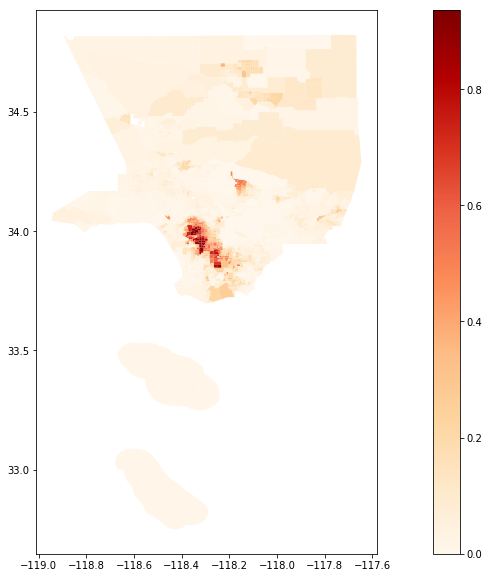

In [24]:
ax1 = gdf_2000.plot(column='rel',
                    cmap = 'OrRd', 
                    figsize=(20,10),
                    legend = True)

In [25]:
# Non-Spatial measures
D_2000 = Dissim(gdf_2000, 'nhblk00', 'pop00')
G_2000 = Gini_Seg(gdf_2000, 'nhblk00', 'pop00')
H_2000 = Entropy(gdf_2000, 'nhblk00', 'pop00')
A_2000 = Atkinson(gdf_2000, 'nhblk00', 'pop00')
xPy_2000 = Exposure(gdf_2000, 'nhblk00', 'pop00')
xPx_2000 = Isolation(gdf_2000, 'nhblk00', 'pop00')
R_2000 = Con_Prof(gdf_2000, 'nhblk00', 'pop00')
Dbc_2000 = Bias_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
Ddc_2000 = Density_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
V_2000 = Correlation_R(gdf_2000, 'nhblk00', 'pop00')
Dct_2000 = Modified_Dissim(gdf_2000, 'nhblk00', 'pop00')
Gct_2000 = Modified_Gini_Seg(gdf_2000, 'nhblk00', 'pop00')

In [26]:
# Spatial measures
SD_2000 = Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
PARD_2000 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
BSD_2000 = Boundary_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
ACE_2000 = Absolute_Centralization(gdf_2000, 'nhblk00', 'pop00')
ACO_2000 = Absolute_Concentration(gdf_2000, 'nhblk00', 'pop00')
DEL_2000 = Delta(gdf_2000, 'nhblk00', 'pop00')
RCE_2000 = Relative_Centralization(gdf_2000, 'nhblk00', 'pop00')
RCL_2000 = Relative_Clustering(gdf_2000, 'nhblk00', 'pop00')
RCO_2000 = Relative_Concentration(gdf_2000, 'nhblk00', 'pop00')
SxPy_2000 = Spatial_Exposure(gdf_2000, 'nhblk00', 'pop00')
SxPx_2000 = Spatial_Isolation(gdf_2000, 'nhblk00', 'pop00')
SPP_2000 = Spatial_Prox_Prof(gdf_2000, 'nhblk00', 'pop00')
SP_2000 = Spatial_Proximity(gdf_2000, 'nhblk00', 'pop00')

In [27]:
all_measures_2000 = (D_2000, G_2000, H_2000, xPx_2000, xPy_2000, A_2000, V_2000, R_2000, Dct_2000, Gct_2000, Dbc_2000, Ddc_2000, SPP_2000, SD_2000, BSD_2000, PARD_2000, SxPx_2000, SxPy_2000, SP_2000, RCL_2000, DEL_2000, ACO_2000, RCO_2000, ACE_2000, RCE_2000)

In [28]:
pairwise = tuple(zip(all_measures, all_measures_2000))

In [29]:
e = ThreadPoolExecutor()

la_la_application = [e.submit(Timed_Compare_Segregation, i, iterations = overall_iterations_frequency) 
                              for i in pairwise]

In [30]:
la_la_application_result = [f.result() for f in la_la_application]

Correlation_R time: 126.82546544075012
Isolation time: 128.83116388320923
Dissim time: 129.1416552066803
Exposure time: 130.1368601322174
Atkinson time: 130.38998198509216
Entropy time: 136.31582832336426
Gini_Seg time: 206.85539436340332
Delta time: 1060.1444129943848
Absolute_Concentration time: 1096.3135440349579
Relative_Concentration time: 1123.3079302310944
Bias_Corrected_Dissim time: 2614.173842906952
Con_Prof time: 2632.158705472946
Modified_Dissim time: 4617.4226360321045
Relative_Centralization time: 7698.750255584717
Absolute_Centralization time: 7741.277366638184
Relative_Clustering time: 7907.388085603714
Spatial_Proximity time: 7920.9240646362305
Spatial_Exposure time: 7925.4881048202515
Spatial_Isolation time: 8008.930032253265
Spatial_Dissim time: 13138.448255777359
Boundary_Spatial_Dissim time: 18424.425527095795
Perimeter_Area_Ratio_Spatial_Dissim time: 18710.10956978798
Spatial_Prox_Prof time: 35101.06638050079
Density_Corrected_Dissim time: 43187.68896198273
Modifie

In [31]:
# Save results
with open('la_la_application_result_notebook.pkl', 'wb') as output:
    pickle.dump(la_la_application_result, output, pickle.HIGHEST_PROTOCOL)

### Los Angeles against New York in 2010: random data approach

In [32]:
df = census_2010.loc[(census_2010.county.isin(["New York County", "Bronx County", "Kings County", "Queens County", "Richmond County"])) & (census_2010.state == 'NY')] # & (census_2010.state == 'WI')
df

,trtid10,state,county,tract,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
55589,36005000100,NY,Bronx County,Census Tract 1,11091,782,6208,26,39,3779,...,0,60,39,0,1,25,0,0,bh,Minority
55590,36005000200,NY,Bronx County,Census Tract 2,4334,130,1012,12,137,2993,...,730,476,133,32,18,12,5,0,bha,Minority
55591,36005000400,NY,Bronx County,Census Tract 4,5503,189,1365,14,126,3755,...,932,476,116,26,16,11,3,2,bh,Minority
55592,36005001600,NY,Bronx County,Census Tract 16,5643,195,1854,24,58,3482,...,807,700,50,3,6,16,5,4,bh,Minority
55593,36005001900,NY,Bronx County,Census Tract 19,1917,187,502,10,27,1186,...,302,89,22,1,0,10,2,0,bh,Minority
55595,36005002000,NY,Bronx County,Census Tract 20,8731,112,3101,45,93,5361,...,1449,745,90,16,8,44,20,2,bh,Minority
55597,36005002300,NY,Bronx County,Census Tract 23,4933,41,1628,9,13,3223,...,827,605,9,2,3,8,5,2,bh,Minority
55599,36005002400,NY,Bronx County,Census Tract 24,4,0,0,0,0,4,...,0,0,0,0,0,0,0,0,h,Minority
55601,36005002500,NY,Bronx County,Census Tract 25,5491,78,1001,11,40,4349,...,1142,559,26,5,1,10,2,2,bh,Minority
55603,36005002701,NY,Bronx County,Census Tract 27.01,3113,28,1009,15,6,2050,...,562,271,5,4,0,15,8,1,bh,Minority


In [33]:
ny_gdf_pre = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
ny_gdf = ny_gdf_pre[['geometry', 'pop10', 'nhblk10']]

ny_gdf['share'] = np.where(ny_gdf['pop10'] == 0, 0, ny_gdf['nhblk10'] / ny_gdf['nhblk10'].sum())
ny_gdf['rel']   = np.where(ny_gdf['pop10'] == 0, 0, ny_gdf['nhblk10'] / ny_gdf['pop10'])

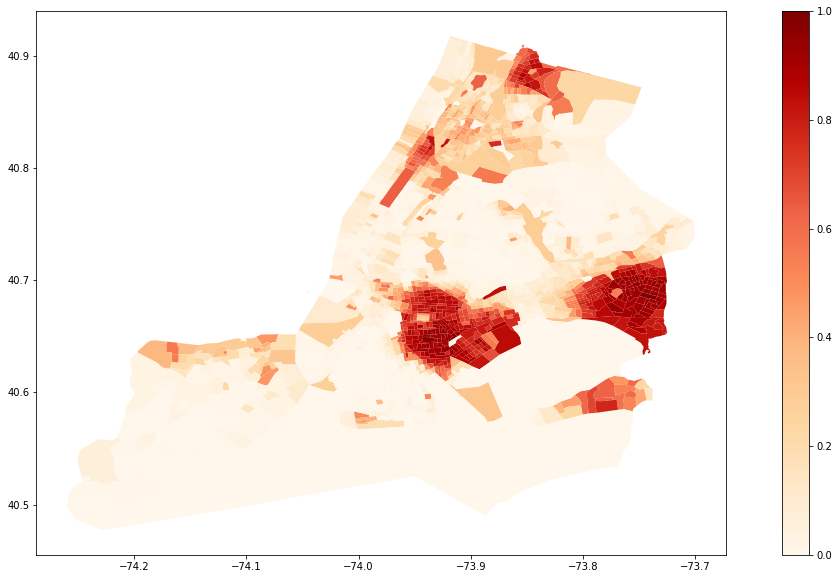

In [34]:
ax1 = ny_gdf.plot(column='rel',
                  cmap = 'OrRd', 
                  figsize=(20,10),
                  legend = True)

In [35]:
# Non-Spatial measures
ny_D = Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_G = Gini_Seg(ny_gdf, 'nhblk10', 'pop10')
ny_H = Entropy(ny_gdf, 'nhblk10', 'pop10')
ny_A = Atkinson(ny_gdf, 'nhblk10', 'pop10')
ny_xPy = Exposure(ny_gdf, 'nhblk10', 'pop10')
ny_xPx = Isolation(ny_gdf, 'nhblk10', 'pop10')
ny_R = Con_Prof(ny_gdf, 'nhblk10', 'pop10')
ny_Dbc = Bias_Corrected_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_Ddc = Density_Corrected_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_V = Correlation_R(ny_gdf, 'nhblk10', 'pop10')
ny_Dct = Modified_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_Gct = Modified_Gini_Seg(ny_gdf, 'nhblk10', 'pop10')

In [36]:
# Spatial measures
ny_SD = Spatial_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_PARD = Perimeter_Area_Ratio_Spatial_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_BSD = Boundary_Spatial_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_ACE = Absolute_Centralization(ny_gdf, 'nhblk10', 'pop10')
ny_ACO = Absolute_Concentration(ny_gdf, 'nhblk10', 'pop10')
ny_DEL = Delta(ny_gdf, 'nhblk10', 'pop10')
ny_RCE = Relative_Centralization(ny_gdf, 'nhblk10', 'pop10')
ny_RCL = Relative_Clustering(ny_gdf, 'nhblk10', 'pop10')
ny_RCO = Relative_Concentration(ny_gdf, 'nhblk10', 'pop10')
ny_SxPy = Spatial_Exposure(ny_gdf, 'nhblk10', 'pop10')
ny_SxPx = Spatial_Isolation(ny_gdf, 'nhblk10', 'pop10')
ny_SPP = Spatial_Prox_Prof(ny_gdf, 'nhblk10', 'pop10')
ny_SP = Spatial_Proximity(ny_gdf, 'nhblk10', 'pop10')

In [37]:
ny_all_measures = (ny_D, ny_G, ny_H, ny_xPx, ny_xPy, ny_A, ny_V, ny_R, ny_Dct, ny_Gct, ny_Dbc, ny_Ddc, ny_SPP, ny_SD, ny_BSD, ny_PARD, ny_SxPx, ny_SxPy, ny_SP, ny_RCL, ny_DEL, ny_ACO, ny_RCO, ny_ACE, ny_RCE)

In [38]:
la_ny_pairwise = tuple(zip(all_measures, ny_all_measures))

In [39]:
e = ThreadPoolExecutor()

la_ny_application = [e.submit(Timed_Compare_Segregation, i, iterations = overall_iterations_frequency) 
                              for i in la_ny_pairwise]

In [40]:
la_ny_application_result = [f.result() for f in la_ny_application]

Correlation_R time: 121.61651372909546
Dissim time: 124.48260021209717
Isolation time: 125.52153062820435
Exposure time: 126.43485522270203
Atkinson time: 127.55269646644592
Entropy time: 132.47549700737
Gini_Seg time: 201.03359937667847
Absolute_Concentration time: 919.0658528804779
Relative_Concentration time: 937.8400347232819
Delta time: 965.6135802268982
Bias_Corrected_Dissim time: 2940.1443169116974
Con_Prof time: 3051.0170624256134
Modified_Dissim time: 4786.533602237701
Relative_Centralization time: 8059.2792110443115
Relative_Clustering time: 8088.744219779968
Spatial_Proximity time: 8161.009376049042
Absolute_Centralization time: 8219.44737958908
Spatial_Exposure time: 8250.730751752853
Spatial_Isolation time: 8325.104460477829
Spatial_Dissim time: 11640.896238803864
Boundary_Spatial_Dissim time: 16359.728666067123
Perimeter_Area_Ratio_Spatial_Dissim time: 16630.29322361946
Spatial_Prox_Prof time: 30943.786457538605
Density_Corrected_Dissim time: 37230.30221867561
Modified_Gi

In [41]:
# Save results
with open('la_ny_application_result_notebook.pkl', 'wb') as output:
    pickle.dump(la_ny_application_result, output, pickle.HIGHEST_PROTOCOL)

In [42]:
GLOBAL_T1 = time.time()
GLOBAL_T1 - GLOBAL_T0

124870.08024549484